# Transformée en Z

La transformée en Z est l'équivalent discret de la transformée de Laplace.
Contrairement à Fourier et Laplace,
Z n'est pas un scientifique mais seulement le nom que l'on a donné à la variable de cette transformée.

## Définition

La transformée en Z d'un signal à temps discret $x[n]$ est :

$$
X(z) = \sum_{n=-\infty}^{+\infty} x[n] z^{-n}
$$

où $z = \rho e^{j\theta}$ est la variable (complexe).
C'est une variable continue, même si $s$ est échantillonné.
Cette formule ressemble à la transformée de Fourier discrète, mais l'exponentielle est ici remplacée par la variable $z$.

On notera dans la suite : $X(z) = \mathcal{Z}[x[n]]$.

$H(z)$ est la fonction de transfert du filtre numérique de réponse impulsionnelle $h[n]$,
et exprime le quotient des transformées en Z de la sortie sur l'entrée :

$$
H(z) = \frac{Y(z)}{X(z)}.
$$

## Représentation

De même que pour la transformée de Laplace, la transformée en Z est une fonction complexe d'une variable complexe
et il serait difficile et inutile de la représenter.

On utilise alors le diagramme pôles–zéros qui se construit de la même manière
que pour la {ref}`transformée de Laplace <S:laplace:pz>`.

Lorque $\rho=1$, alors $z=e^{j\theta}$.
En réécrivant $\theta = 2\pi f$, on retrouve alors l'expression de la transformée de Fourier discrète.
En d'autres termes, la transformée de Fourier discrète est égale à la transformée en Z lorsque $z$ est de module 1.
Cela correspond à un cercle de rayon 1 centré sur l'origine.

## Transformée inverse

La transformée en Z inverse de $X(z)$ est :

$$
x[n] = \frac{1}{2\pi j} \oint X(z) z^{n-1} dz.
$$

Le drôle de symbole $\oint$ signifie que l'intégrale est calculée sur un contour fermé.
Dans la pratique, le calcul de $x[n]$ à partir de $X(z)$ est obtenu en pratique en utilisant des
[tables](https://en.wikipedia.org/wiki/Z-transform#Table_of_common_Z-transform_pairs),
car les transformées en Z s'expriment sous forme d'une fraction rationnelle&nbsp;:

$$
H(z) = \frac{ \sum_{m=0}^{M} b_m z^{-m} }{ \sum_{n=0}^{N} a_n z^{-n} }
     = k \frac{ \prod_{m=0}^{M} (1-z_mz^{-1}) }{ \prod_{n=0}^{N} (1-p_nz^{-1}) }
$$

La fonction de transfert est donc définie par ses coefficients $b_m$ et $a_n$, ou par ses zéros $z_m$, pôles $p_n$ et gain $k$.

## Propriétés

Les propriétés de la transformée en Z sont similaires à celles des transformées de Fourier et de Laplace.
On note $a$ et $b$ deux constantes, $x$, $x_1$ et $x_2$ des signaux
et $X$, $X_1$ et $X_2$ leurs transformées en Z respectives.

* Linéarité :
  
  $$
  ax_1[n] + bx_2[n]
  \quad\xrightarrow{\quad\mathcal{Z}\quad}\quad
  a X_1(z) + b X_2(z)
  $$

* Translation :

  $$
  x[n-N]
  \quad\xrightarrow{\quad\mathcal{Z}\quad}\quad
  z^{-N} X(z)
  $$

* Convolution :

  $$
  (x_1*x_2)[n]
  \quad\xrightarrow{\quad\mathcal{Z}\quad}\quad
  X_1(z) \times X_2(z)
  $$

## Région de convergence et stabilité

Comme pour la transformée de Laplace, on peut définir une région de convergence avec la transformée en Z,
et qui indique les régions où la transformée en Z converge.
Prenons l'exemple de la réponse impulsionnelle $h[n] = a^n u[n]$.
Sa transformée en Z est :

$$
H(z) &= \sum_{n=-\infty}^{+\infty} h[n] z^{-n} \\
     &= \sum_{n=0}^{+\infty} a^n z^{-n} \\
     &= \sum_{n=0}^{+\infty} (az^{-1})^n
$$

$H(z)$ est la somme des termes d'une suite géométrique de raison $az^{-1}$.
Cette suite est convergente si et seulement si $|az^{-1}|<1$.
Si cette condition est respectée, alors (rappelez-vous de la [formule de la série géométrique](https://fr.wikipedia.org/wiki/S%C3%A9rie_g%C3%A9om%C3%A9trique#Terme_g%C3%A9n%C3%A9ral)) :

$$
H(z) = \frac{1-\lim_{n \to +\infty} (az^{-1})^n}{1-az^{-1}}
$$

Si la condition $|az^{-1}|<1$ est respectée, alors la limite $\lim_{n \to +\infty} (az^{-1})^n$ tend vers 0 et finalement :

$$
H(z) = \frac{1}{1-az^{-1}}.
$$

Cette fonction de transfert n'a pas de zéro et un seul pôle $z=a$.

La condition précédente est équivalente à $|z| > |a|$ et elle définit la région de convergence du système.
On peut donc représenter le diagramme pôles–zéros ({numref}`F:z:pz`).

```{glue:figure} G:z:pz
:name: "F:z:pz"

Diagramme pôles–zéros et région de convergence du système de réponse impulsionnelle $h[n] = a^n u[n]$
(ici, $a=0.7$).
```

Dans l'exemple de la {numref}`F:z:pz` où $a=0,7$,
le lieu de la transformée de Fourier discrète étant intégralement dans la région de convergence,
on en déduit que le système est stable.

De manière générale, on montre qu'un système numérique est stable
si et seulement si tous ses pôles sont dans le cercle unité (cercle de rayon 1 centré sur l'origine),
impliquant qu'ils sont de module inférieur à 1.

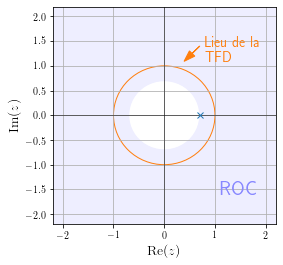

In [28]:
# Diagramme pôlez-zéros et ROC de a^n u[n]

import numpy as np
# import scipy.signal as sig
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from myst_nb import glue

matplotlib.rcParams['text.usetex'] = True

lim = 2.2

a = 0.7
z = []
p = a

fig = plt.figure(figsize=(4,4))
ax = plt.subplot()
plt.grid()

# Axes
plt.plot([-lim, lim], [0, 0], "k", linewidth=.5)
plt.plot([0, 0], [-lim, lim], "k", linewidth=.5)

# ROC
# https://stackoverflow.com/questions/22789356/plot-a-donut-with-fill-or-fill-between-use-pyplot-in-matplotlib
n = 50
radii = [a, lim*2]
theta = np.linspace(0, 2*np.pi, n, endpoint=True)
xs = np.outer(radii, np.cos(theta))
ys = np.outer(radii, np.sin(theta))
xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]
ax.fill(np.ravel(xs), np.ravel(ys), color='#eeeeff')
plt.text(1.1, -1.6, "ROC", color="#8888ff", size=20)


# Pôles
plt.plot(np.real(p), np.imag(p), "x", color="tab:blue")

# Zéros
plt.plot(np.real(z), np.imag(z), "o", color="tab:blue")

# TF
p = pat.Circle((0,0), 1, facecolor="None", edgecolor="tab:orange", linewidth=1)
ax.add_patch(p)
plt.arrow(.7, 1.4, -.15, -.15, color="tab:orange", head_width=0.15)
plt.text(.8, 1.1, "Lieu de la\nTFD", color="tab:orange", size=14)

plt.axis([-lim, lim, -lim, lim])
plt.xlabel(r"$\mathrm{Re}(z)$", size=14)
plt.ylabel(r"$\mathrm{Im}(z)$", size=14)

glue("G:z:pz", fig, display=False)